## Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### <font color='purple'> First, I am running the network without noise added as a baseline.</font>

In [3]:
batch_size = 128
num_classes = 10
epochs = 20



y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
baseline_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', baseline_score[0])
print('Test accuracy:', baseline_score[1])
baseline_accuracy = baseline_score[1]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [

In [4]:
baseline_accuracy

0.984000027179718

### <font color='purple'> Below, I am printing some images and their labels from the unaltered (baseline) dataset.</font>

In [5]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape


((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [6]:
import matplotlib.pyplot as  plt
%matplotlib inline

import numpy as np

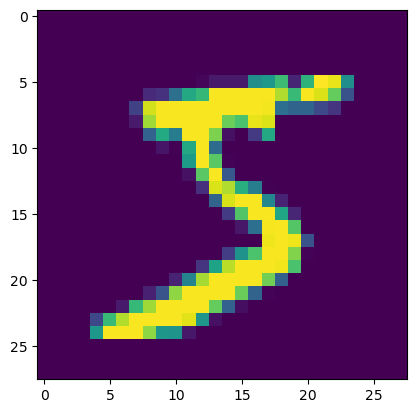

In [7]:
plt.imshow(x_train[0].reshape(28,28))

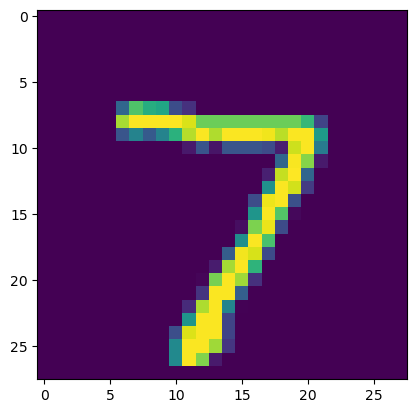

In [8]:
plt.imshow(x_test[0].reshape(28,28))

In [9]:
from numpy import argmax

argmax(keras.utils.to_categorical(y_train[0], 10),axis=1)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [10]:
argmax(keras.utils.to_categorical(y_test[0], 10),axis=1)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

### <font color='purple'> Adding noise here</font>

In [11]:
scale = [0.1, 0.5, 1.0, 2.0, 4.0]

In [12]:
noise_0_train = np.random.normal(scale=0.1, size=[60000, 784])
noise_1_train = np.random.normal(scale=0.5, size=[60000, 784])
noise_2_train = np.random.normal(scale=1.0, size=[60000, 784])
noise_3_train = np.random.normal(scale=2.0, size=[60000, 784])
noise_4_train = np.random.normal(scale=4.0, size=[60000, 784])

noise_0_test = np.random.normal(scale=0.1, size=[10000, 784])
noise_1_test = np.random.normal(scale=0.5, size=[10000, 784])
noise_2_test = np.random.normal(scale=1.0, size=[10000, 784])
noise_3_test = np.random.normal(scale=2.0, size=[10000, 784])
noise_4_test = np.random.normal(scale=4.0, size=[10000, 784])

In [13]:
x_train_n0 = x_train + noise_0_train
x_train_n1 = x_train + noise_1_train
x_train_n2 = x_train + noise_2_train
x_train_n3 = x_train + noise_3_train
x_train_n4 = x_train + noise_4_train

x_test_n0 = x_test + noise_0_test
x_test_n1 = x_test + noise_1_test
x_test_n2 = x_test + noise_2_test
x_test_n3 = x_test + noise_3_test
x_test_n4 = x_test + noise_4_test

### <font color='purple'> Inspecting noisy images here</font>

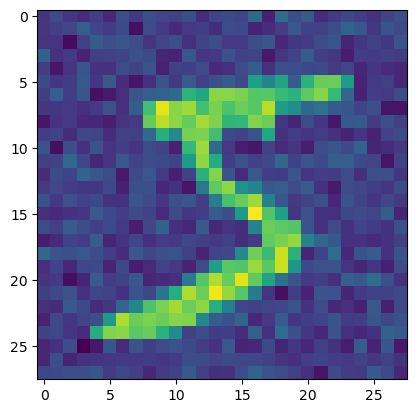

In [14]:
plt.imshow(x_train_n0[0].reshape(28,28))

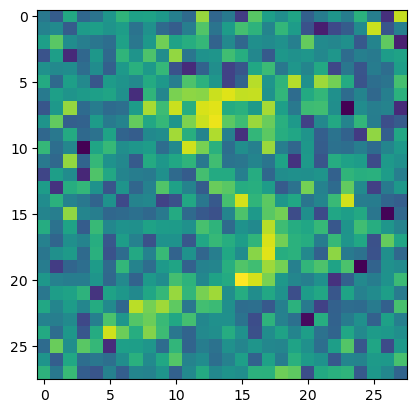

In [15]:
plt.imshow(x_train_n1[0].reshape(28,28))

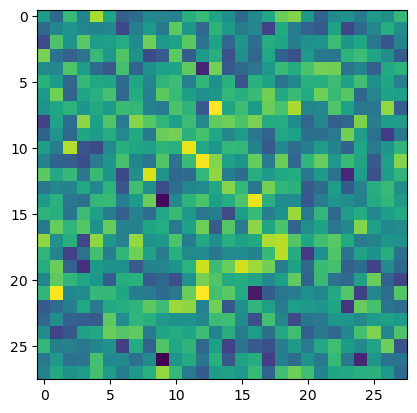

In [16]:
plt.imshow(x_train_n2[0].reshape(28,28))

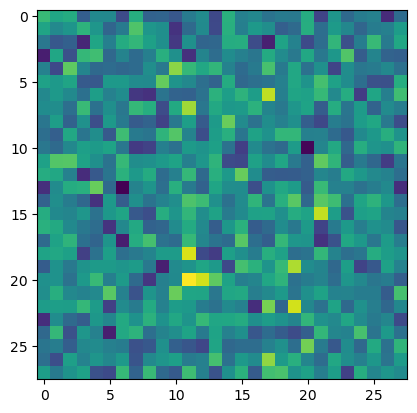

In [17]:
plt.imshow(x_train_n3[0].reshape(28,28))

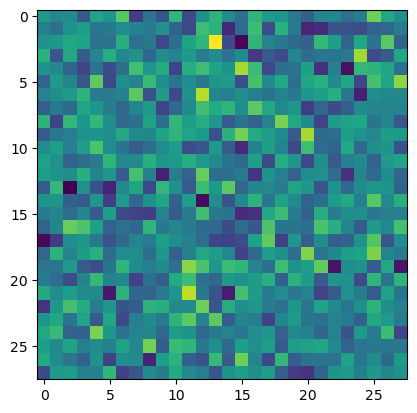

In [18]:
plt.imshow(x_train_n4[0].reshape(28,28))

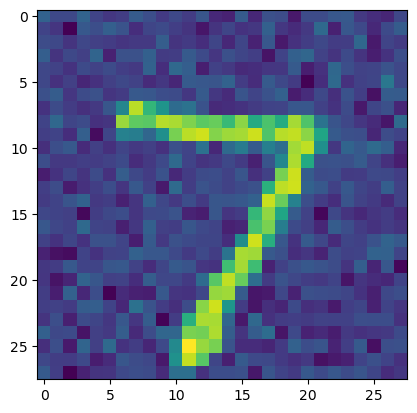

In [19]:
plt.imshow(x_test_n0[0].reshape(28,28))

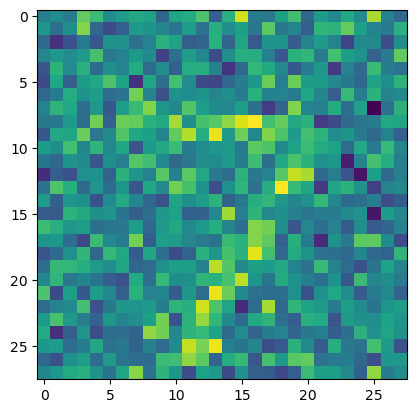

In [20]:
plt.imshow(x_test_n1[0].reshape(28,28))

### <font color='purple'> I will use the following code chunks to train the NN with the different noise parameters (created above). I will also keep track of each accuracy score output, in respect to the noise parameters used during training.</font>

In [21]:
batch_size = 128
num_classes = 10
epochs = 20

x_train_noisy = [x_train_n0, x_train_n1, x_train_n2, x_train_n3, x_train_n4]
x_test_noisy = [x_test_n0, x_test_n1, x_test_n2, x_test_n3, x_test_n4]

noisy_scores = []


    
for i in [0,1,2,3,4]:
    model_noisy = Sequential()
    model_noisy.add(Dense(512, activation='relu', input_shape=(784,)))
    model_noisy.add(Dropout(0.2))
    model_noisy.add(Dense(512, activation='relu'))
    model_noisy.add(Dropout(0.2))
    model_noisy.add(Dense(10, activation='softmax'))

   

    model_noisy.compile(loss='categorical_crossentropy',
            optimizer="adam",
            metrics=['accuracy'])

    history_noisy = model_noisy.fit(x_train_noisy[i], y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test_noisy[i], y_test))
    score_noisy = model_noisy.evaluate(x_test_noisy[i], y_test, verbose=0)
        
        
    noisy_scores.append(score_noisy[1])



Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2699 - accuracy: 0.9173 - val_loss: 0.1269 - val_accuracy: 0.9609
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1006 - accuracy: 0.9686 - val_loss: 0.0850 - val_accuracy: 0.9720
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0602 - accuracy: 0.9813 - val_loss: 0.0887 - val_accuracy: 0.9723
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0421 - accuracy: 0.9865 - val_loss: 0.0863 - val_accuracy: 0.9739
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0327 - accuracy: 0.9888 - val_loss: 0.0832 - val_accuracy: 0.9756
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0279 - accuracy: 0.9908 - val_loss: 0.1033 - val_accuracy: 0.9727
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0235 - accuracy: 0.9920 - val_loss: 0.1002 - val_accuracy: 0.9745
Epoch 

In [22]:
baseline_accuracy, noisy_scores

(0.984000027179718,
 [0.9803000092506409,
  0.9194999933242798,
  0.762499988079071,
  0.42089998722076416,
  0.20010000467300415])

([<matplotlib.axis.XTick at 0x16bee2d40>,
 [Text(0.1, 0, '0.1'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(2.0, 0, '2.0'),
  Text(4.0, 0, '4.0')])

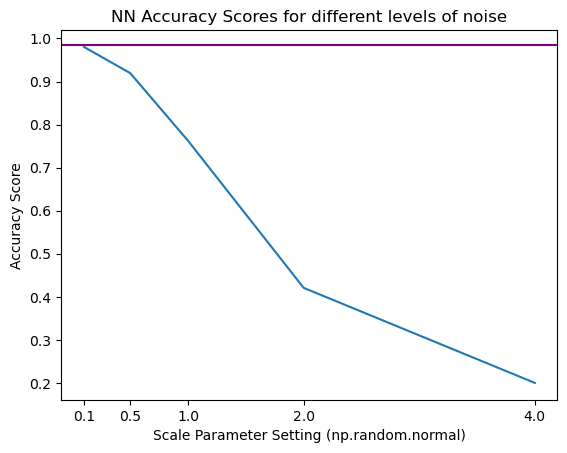

In [24]:
plt.figure()
plt.xlabel('Scale Parameter Setting (np.random.normal)')
plt.ylabel('Accuracy Score')
plt.plot(scale, noisy_scores)
plt.axhline(baseline_accuracy, color='purple') # baseline accuracy score
plt.title("NN Accuracy Scores for different levels of noise")
plt.xticks(ticks=scale)

### <font color='purple'> The purple, horizontal line, in the plot above represents the baseline (unmodified data's) accuracy score.